# DBSCAN Challenge
Within this challenge, you're going to use DBSCAN on the famous Iris dataset to cluster the petal length and petal width. Typically, clustering is done using all columns but for visualization purposes, we're only going to use two in this exercise.

In [4]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.cluster import DBSCAN
from sklearn.preprocessing import OrdinalEncoder
from sklearn import datasets


As said in the introduction, we're only going to use `petal_length` and `petal_width` to cluster observations to see similar/different `species` are.

In [15]:
# Load the dataset.
data = sns.load_dataset('iris')

# The BEFORE view
print(data.sample(5, random_state=42))

# For the 'species' column, replace [setosa, versicolor, virginica] with [0, 1, 2], respectively.
# To be explicit, this means that all observations with a species of "setosa" should now have a species of 0

data["species"] = OrdinalEncoder(categories=[["setosa",
                                "versicolor",
                                "virginica"]]).fit_transform(data[["species"]])

# The AFTER view
# (neat, you can get same samples by providing `random_state` attribute)
print(data.sample(5, random_state=42))


     sepal_length  sepal_width  petal_length  petal_width     species
73            6.1          2.8           4.7          1.2  versicolor
18            5.7          3.8           1.7          0.3      setosa
118           7.7          2.6           6.9          2.3   virginica
78            6.0          2.9           4.5          1.5  versicolor
76            6.8          2.8           4.8          1.4  versicolor
     sepal_length  sepal_width  petal_length  petal_width  species
73            6.1          2.8           4.7          1.2      1.0
18            5.7          3.8           1.7          0.3      0.0
118           7.7          2.6           6.9          2.3      2.0
78            6.0          2.9           4.5          1.5      1.0
76            6.8          2.8           4.8          1.4      1.0


In [16]:
# Split the dataset into just X and Y
# Note: Since we're clustering, there's no need to split into train/validation/test splits but rather just X and Y

# Definition of feature and label columns
features = ["petal_length", "petal_width"]
label = "species"

# Split to X and y
X = data[features]
y = data[label]

In [17]:
X

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [18]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: species, Length: 150, dtype: float64

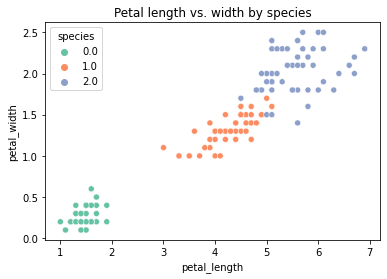

In [23]:
# Using matplotlib, plot the original datapoints such that each species is a different color
# Make petal_length the x-axis and petal_width the y-axis
# For example, all observations with (species == 0) should be red, all observations with species == 1 should be blue, etc.

ax = sns.scatterplot(x="petal_length", y="petal_width", hue=y, data=X, palette="Set2")
ax.set_title("Petal length vs. width by species")
plt.show()


In [27]:
# Using the default parameters of DBSCAN in Scikit-Learn, cluster the observations and print out each observations predictions.
# For example, the output should be something like [0, 0, 1, 1, 2, 2, ...]

# Fitting and prediction of DBSCAN algorithm (stored to y_predict)
y_predict = DBSCAN().fit_predict(X)

# Output
print(y_predict)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


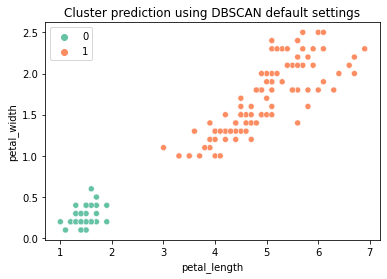

In [30]:
# Using these predictions, again plot the predicted clusters with matplotlib.

ax = sns.scatterplot(x="petal_length", y="petal_width", hue=y_predict, data=X, palette="Set2")
ax.set_title("Cluster prediction using DBSCAN default settings")
plt.show()

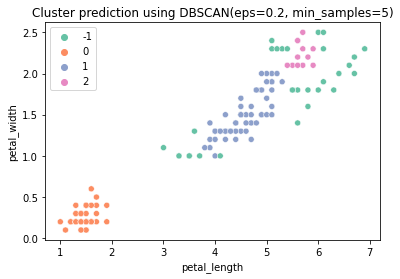

In [31]:
# Now choose epsilon to be 0.2 and minsamples to be 5 and repeat the process of predicting.
# If you cannot recall what these hyperparameters represent, refer back to the Quest so that you have an understanding of what is changing

# Prediction with custom set epsilon and min_samples
y_predict = DBSCAN(eps=0.2, min_samples=5).fit_predict(X)

# Replot the same thing
ax = sns.scatterplot(x="petal_length", y="petal_width", hue=y_predict, data=X, palette="Set2")
ax.set_title("Cluster prediction using DBSCAN(eps=0.2, min_samples=5)")
plt.show()


In [ ]:
# Question: Within these predictions, what do you think -1 represents? Remember that the only labels that we assigned we're 0, 1, and 2. 
# To give you a hint, what are the two things that DBSCAN is concerned with (which is also listed in the Quest)?

# ANSWER HERE

# -1 will be noise


In [ ]:
# Now using the predictions with epsilon = 0.2 and minsamples = 5

# INSERT CODE HERE

# What?

Now, hopefully you have a solid understanding of what DBSCAN is, how to implement this using Scikit-Learn, and how big of a difference using different hyper-parameters can cause to your clustering algorithm. 

In an ideal world, there would be one set of hyperparameters that _always_ performs best for every dataset but unfortunately this isn't the case...

As said multiple times, it should be again be noted that clustering algorithms are typically done using _*ALL*_ columns in the dataset but within this exercise, we only used 2 for easy visualization purposes.